In [1]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt

/home/spirit/anaconda3/envs/cy_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/spirit/anaconda3/envs/cy_env/lib/python3.10/site-packages/brainpy/_src/deprecations.py:52: DeprecationWarning: brainpy.dyn.DSRunner is deprecated. Use brainpy.DSRunner instead.
  _deprecate(message)
Predict 2500 steps: : 100%|██████████| 2500/2500 [00:00<00:00, 5399.13it/s]


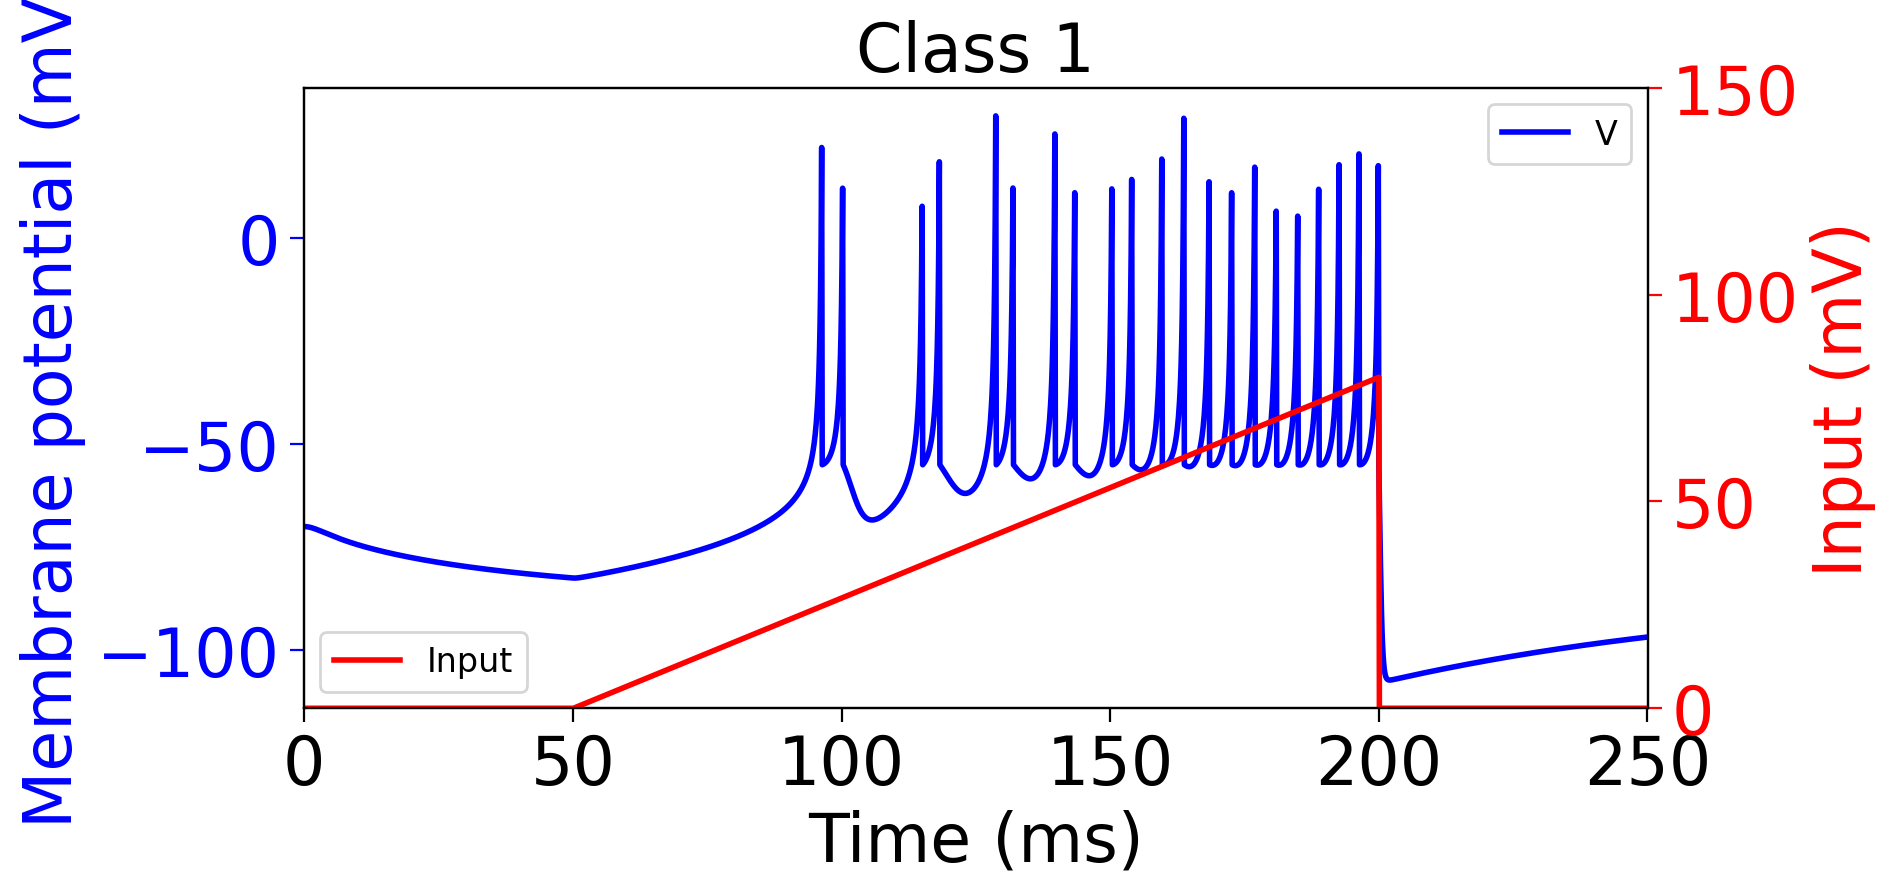

In [2]:
neu = bp.neurons.Izhikevich(1)
neu.a, neu.b, neu.c, neu.d = 0.02, -0.1, -55.0, 6.0

current = bp.inputs.ramp_input(c_start=0., c_end=80., t_start=50., t_end=200., duration=250)
runner = bp.dyn.DSRunner(neu, inputs=['input', current, 'iter'], monitors=['V', 'u'])
runner.run(duration=250.)

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Class 1')
ax1.plot(runner.mon.ts, runner.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 250.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(runner.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 150)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

In [3]:
class HH(bp.dyn.NeuGroup):
  def __init__(self, size, ENa=55., EK=-90., EL=-65, C=1.0, gNa=35.,
               gK=9., gL=0.1, V_th=20., phi=5.0, method='exp_auto'):
    super(HH, self).__init__(size=size)

    # parameters
    self.ENa = ENa
    self.EK = EK
    self.EL = EL
    self.C = C
    self.gNa = gNa
    self.gK = gK
    self.gL = gL
    self.V_th = V_th
    self.phi = phi

    # variables
    self.V = bm.Variable(bm.ones(size) * -65.)
    self.h = bm.Variable(bm.ones(size) * 0.6)
    self.n = bm.Variable(bm.ones(size) * 0.32)
    self.spike = bm.Variable(bm.zeros(size, dtype=bool))
    self.input = bm.Variable(bm.zeros(size))
    self.t_last_spike = bm.Variable(bm.ones(size) * -1e7)

    # integral
    self.integral = bp.odeint(bp.JointEq([self.dV, self.dh, self.dn]), method=method)

  def dh(self, h, t, V):
    alpha = 0.07 * bm.exp(-(V + 58) / 20)
    beta = 1 / (bm.exp(-0.1 * (V + 28)) + 1)
    dhdt = alpha * (1 - h) - beta * h
    return self.phi * dhdt

  def dn(self, n, t, V):
    alpha = -0.01 * (V + 34) / (bm.exp(-0.1 * (V + 34)) - 1)
    beta = 0.125 * bm.exp(-(V + 44) / 80)
    dndt = alpha * (1 - n) - beta * n
    return self.phi * dndt

  def dV(self, V, t, h, n, Iext):
    m_alpha = -0.1 * (V + 35) / (bm.exp(-0.1 * (V + 35)) - 1)
    m_beta = 4 * bm.exp(-(V + 60) / 18)
    m = m_alpha / (m_alpha + m_beta)
    INa = self.gNa * m ** 3 * h * (V - self.ENa)
    IK = self.gK * n ** 4 * (V - self.EK)
    IL = self.gL * (V - self.EL)
    dVdt = (- INa - IK - IL + Iext) / self.C

    return dVdt

  def update(self, tdi):
    V, h, n = self.integral(self.V, self.h, self.n, tdi.t, self.input, tdi.dt)
    self.spike.value = bm.logical_and(self.V < self.V_th, V >= self.V_th)
    self.t_last_spike.value = bm.where(self.spike, tdi.t, self.t_last_spike)
    self.V.value = V
    self.h.value = h
    self.n.value = n
    self.input[:] = 0.

/home/spirit/anaconda3/envs/cy_env/lib/python3.10/site-packages/brainpy/_src/deprecations.py:52: DeprecationWarning: brainpy.dyn.NeuGroup is deprecated. Use brainpy.NeuGroup instead.
  _deprecate(message)


/home/spirit/anaconda3/envs/cy_env/lib/python3.10/site-packages/brainpy/_src/deprecations.py:52: DeprecationWarning: brainpy.dyn.DSRunner is deprecated. Use brainpy.DSRunner instead.
  _deprecate(message)
Predict 3800 steps: : 100%|██████████| 3800/3800 [00:01<00:00, 3169.34it/s]
/home/spirit/anaconda3/envs/cy_env/lib/python3.10/site-packages/brainpy/_src/deprecations.py:52: DeprecationWarning: brainpy.dyn.DSRunner is deprecated. Use brainpy.DSRunner instead.
  _deprecate(message)
Predict 3800 steps: : 100%|██████████| 3800/3800 [00:01<00:00, 2615.25it/s]
/home/spirit/anaconda3/envs/cy_env/lib/python3.10/site-packages/brainpy/_src/deprecations.py:52: DeprecationWarning: brainpy.dyn.DSRunner is deprecated. Use brainpy.DSRunner instead.
  _deprecate(message)
Predict 3800 steps: : 100%|██████████| 3800/3800 [00:00<00:00, 4395.93it/s]
/home/spirit/anaconda3/envs/cy_env/lib/python3.10/site-packages/brainpy/_src/deprecations.py:52: DeprecationWarning: brainpy.dyn.DSRunner is deprecated. Use 

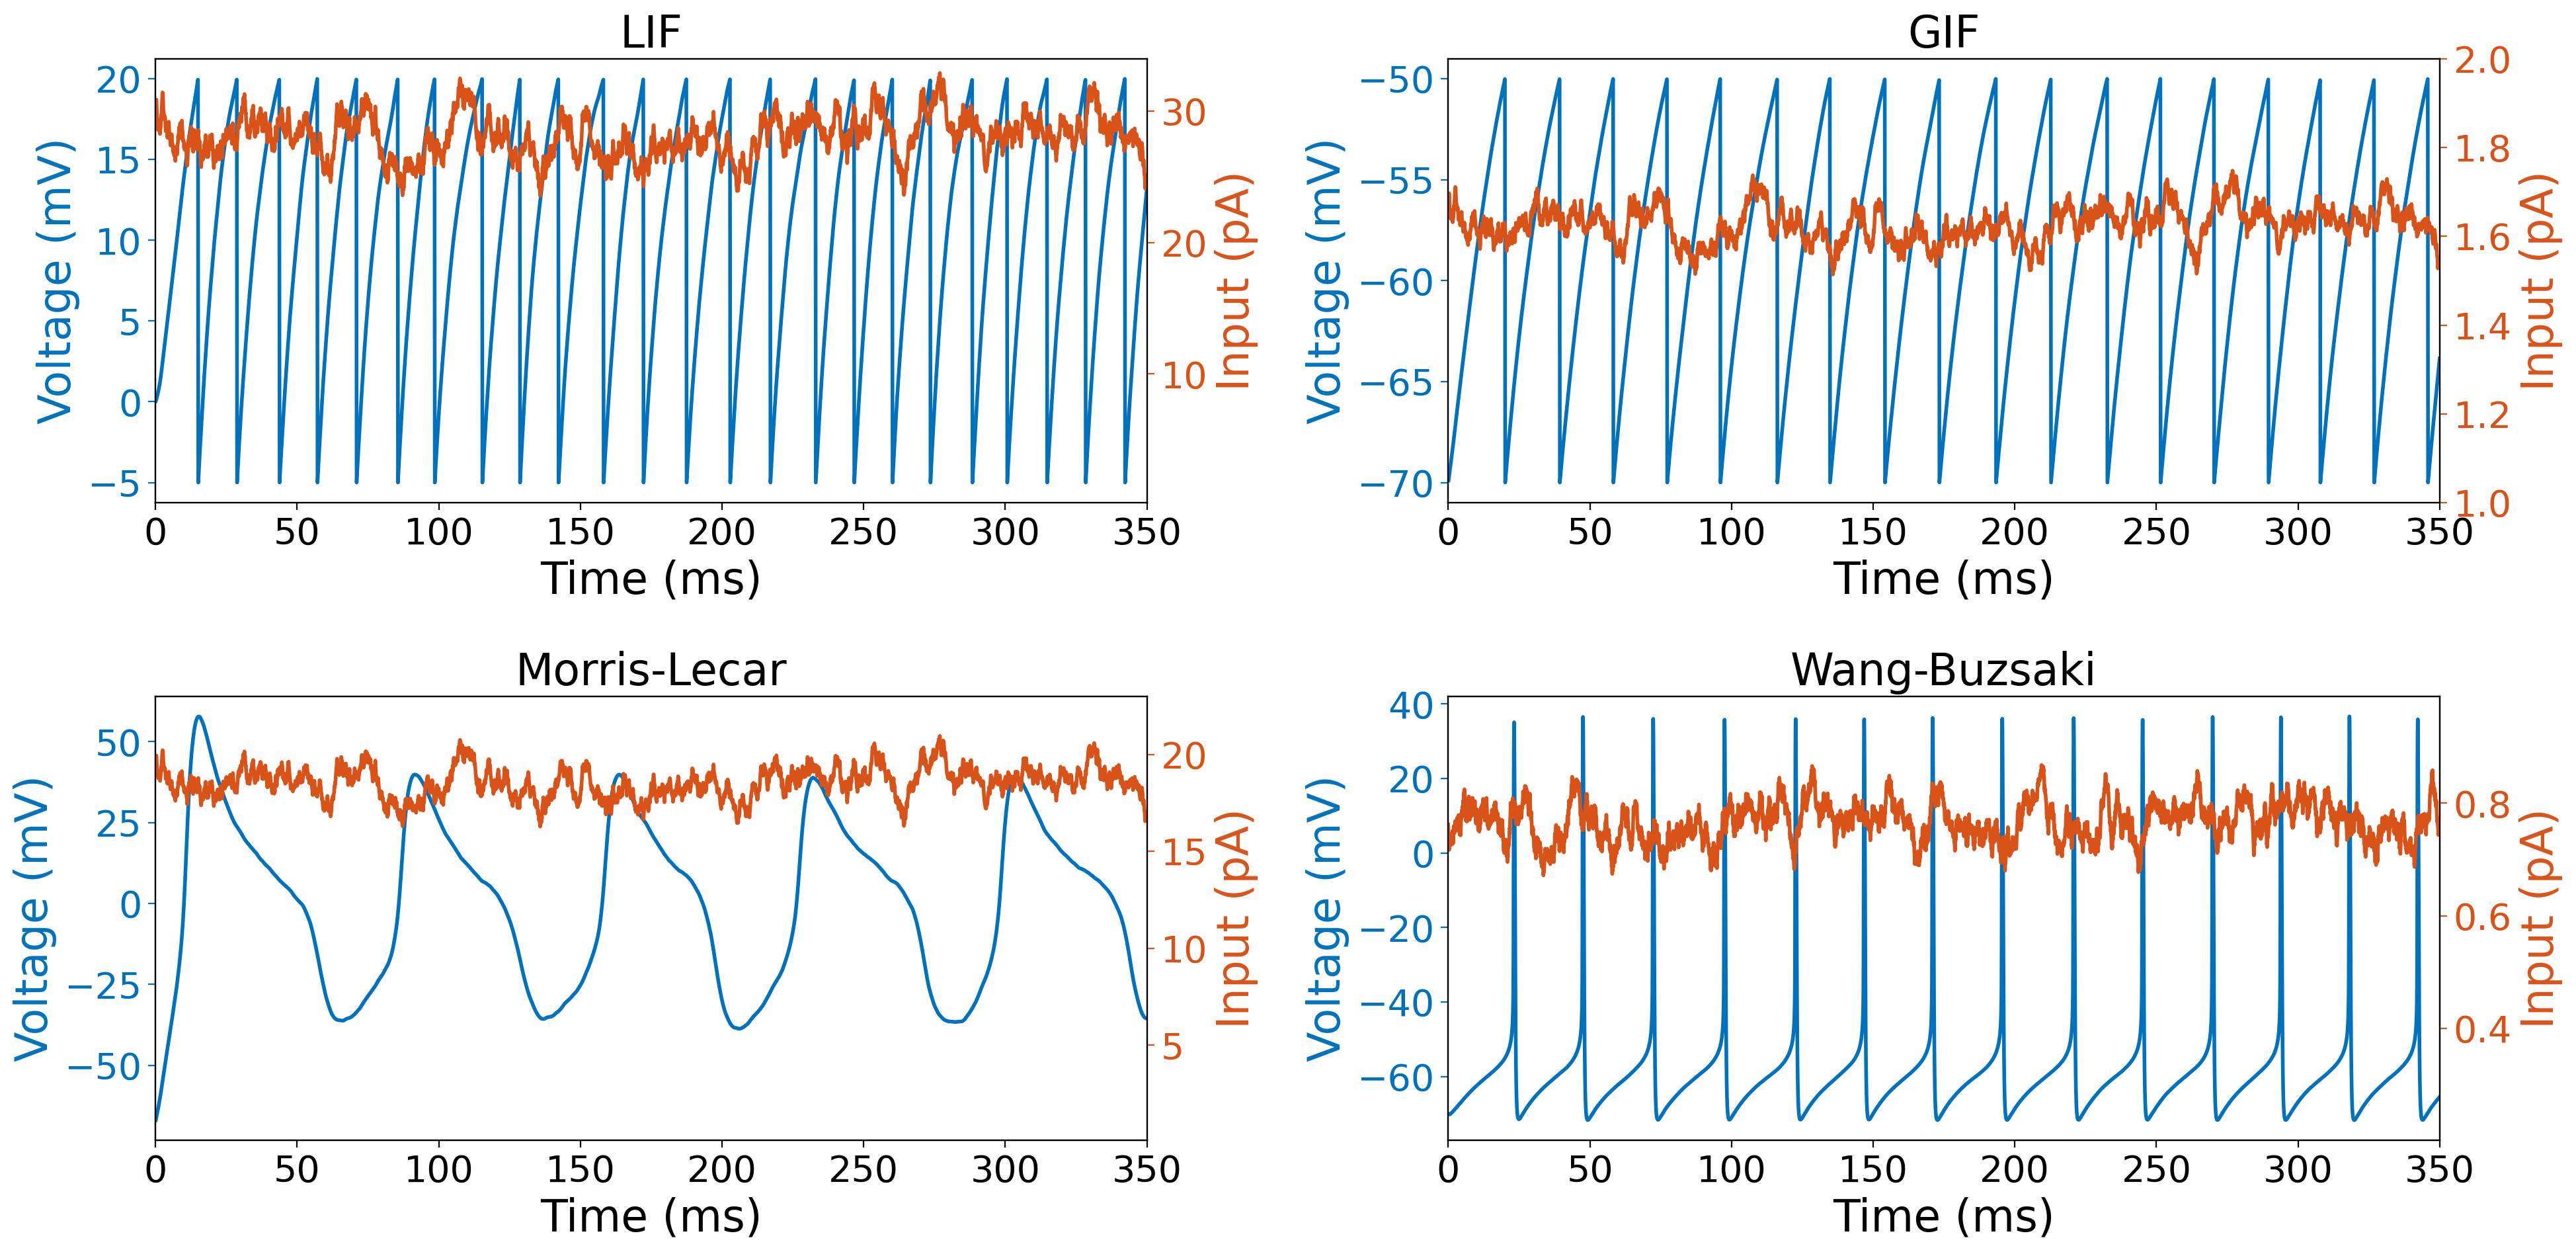

In [6]:
plt_style = {
    'figure.autolayout' : True,
    'font.size' : 24,
    'lines.linewidth' : 2,
    # 'xtick.labelsize' : 'medium',
    # 'ytick.labelsize' : 'medium',
        'xtick.labelsize' : 'small',
    'ytick.labelsize' : 'small',
    'legend.fontsize' : 'small',
    'axes.spines.top' : True,
    'axes.spines.right' : True,
    'xtick.major.size' : 4,
    'ytick.major.size' : 4,
    'legend.fontsize' : 14,
    'axes.labelsize' : 24,
    'axes.titlesize' : 24,
    }
for key, val in plt_style.items():
    plt.rcParams[key] = val


bp.math.set_dt(0.1)
# neu = bp.neurons.Izhikevich(1)
# neu.a, neu.b, neu.c, neu.d = 0.02, -0.1, -55.0, 6.0
neu = bp.neurons.GIF(1)
neu_wang   = HH(1)
neu_wang.V[:]   = -70.
neu_Morris = bp.neurons.MorrisLecar(1)
neu_LIF    = bp.neurons.LIF(1)

duration_time = 380
t_start_point = 200

current0 = bp.inputs.ou_process(seed = 10,mean=3., sigma= 4, tau=4., duration=duration_time, n=1, t_start=0., t_end=duration_time)
current1 = bp.inputs.ou_process(seed = 10,mean=1., sigma= 0.1, tau=4., duration=duration_time, n=1, t_start=0., t_end=duration_time)
current2 = bp.inputs.ou_process(seed = 10,mean=60., sigma= 20, tau=4., duration=duration_time, n=1, t_start=0., t_end=duration_time)
current3 = bp.inputs.ou_process(seed = 10,mean=0.3, sigma= 1, tau=6., duration=duration_time, n=1, t_start=0., t_end=duration_time)

# current0 = bp.inputs.ou_process(mean=0., sigma= 4, tau=4., duration=duration_time, n=1, t_start=0., t_end=duration_time) + 2
# current1 = bp.inputs.ou_process(mean=30., sigma= 3, tau=4., duration=duration_time, n=1, t_start=0., t_end=duration_time) - 20
# current2 = bp.inputs.ou_process(mean=0., sigma= 20, tau=4., duration=duration_time, n=1, t_start=0., t_end=duration_time) + 60
# current3 = bp.inputs.ou_process(mean=0, sigma= 1, tau=6., duration=duration_time, n=1, t_start=0., t_end=duration_time) + 0.3

current = [current0,current1,current2 ,current3]


monitor_list = [['V'],['V'],['V', 'W'],['V']]
neuron_list  = [neu_LIF,neu,neu_Morris,neu_wang]
neuron_name_list  =["LIF","GIF","Morris-Lecar","Wang-Buzsaki"]

neuron_y_lim = [[0.2,34],[1.,2.],[0.1,23],[0.201,0.99]]

fig, axs = plt.subplots(2,2,figsize=(20, 10))
for i,ax in enumerate(axs.flat):
    if i != 3:
        bp.math.set_dt(0.1)
        runner = bp.dyn.DSRunner(neuron_list[i], inputs=['input', current[i], 'iter'], monitors=monitor_list[i])
    else:
        bp.math.set_dt(0.05)
        current_hike = bp.inputs.ou_process(seed = 10,mean=0.1, sigma= 0.1, tau=3., duration=duration_time, n=1, t_start=0., t_end=duration_time)
        runner = bp.dyn.DSRunner(neuron_list[i], inputs=['input', current_hike, 'iter'], monitors=monitor_list[i])
    runner.run(duration=duration_time)
    ax.plot(runner.mon.ts, runner.mon.V[:, 0], color= [0,0.447,0.741], label='V')
    ax.set_title(neuron_name_list[i])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Voltage (mV)', color= [0,0.447,0.741])
    ax.tick_params('y',colors=[0,0.447,0.741])
    ax.set_xlim([0,350])
    # ax[1].set_xlim(-0.1, 250.1)
    # ax.tick_params('y', color= [0,0.447,0.741])
    ax2 = ax.twinx()
    if i == 2:
        ax2.plot(runner.mon.ts[t_start_point:]-20, current[i][t_start_point:]/10, color = [0.85,0.325,0.098], label='Input')
    elif i==3:
        ax2.plot(runner.mon.ts[t_start_point:]-20, current_hike[t_start_point:], color = [0.85,0.325,0.098], label='Input')
    else:
        ax2.plot(runner.mon.ts[t_start_point:]-20, current[i][t_start_point:], color = [0.85,0.325,0.098], label='Input')
    ax2.set_ylim(neuron_y_lim[i])
    ax2.set_xlim([0,350])
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Input (pA)', color = [0.85,0.325,0.098])
    ax2.tick_params('y',colors=[0.85,0.325,0.098])
    
    # ax2.set_ylim(0, 150)
    # ax2.tick_params('y', color = [0.85,0.325,0.098])
    # ax.legend(loc=1)
    # ax2.legend(loc=3)
plt.savefig("Figure/neuron_model.pdf",dpi=300)
